<a href="https://colab.research.google.com/github/syunar/superai-ss3-level1-hackhathon/blob/main/superai_ss3_hack3_signal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Install Dependencies
    - kaggle -> to downloadn and summission
    - autogluon -> build dl ml
    - split-folders -> working with file dir
    - numpy and pandas -> working with dataframe
    - os and glob -> working with file path
    - librosa -> signal prepocessing
- Data Prepocessing
    - read each csv file
    - exclude first 4 rows
    - convert datatype from object to float
    - regex filename into labels
    - use Lib librosa to convert signal time domain to spectrogram images by using short time fourier transform (STFT)
- Save spectrogram images
- Split data
- Create efficientnet model for Image classification by using autogluon
- Train model
- Predict model
- decode labels
- Submission

# Install Dependencies

In [ ]:
!pip install gluoncv
!pip install autogluon
!pip install split-folders

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/superai_hackhaton1_image/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ss3-hackathon-online-signal-processing

 98% 758M/777M [00:03<00:00, 227MB/s]
100% 777M/777M [00:03<00:00, 215MB/s]


In [ ]:
!unzip ss3-hackathon-online-signal-processing.zip

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from glob import glob
import librosa
import librosa.display

In [ ]:
filepath = glob('/content/SN_Train/*')

In [ ]:
def get_data(filepath):
    df = pd.read_csv(filepath, header=3)
    df = df[~(df.time=='waveform')]
    df = df[~(df.time=='t0')]
    df = df[~(df.time=='delta t')]
    df = df[~(df.time=='time')]
    #df['time'] = pd.to_datetime(df.time)
    col_num = ['V1A', 'V1H', 'V1V', 'V2A', 'V2H', 'V2V']
    for c in col_num:
        df[c] = df[c].astype('float')
    df = df.drop('time', axis=1)
    return df

def get_stft_train(df, filepath):
    df_cb = (df['V1A']
             .append(df['V1H'])
             .append(df['V1V'])
             .append(df['V2A'])
             .append(df['V2H'])
             .append(df['V2V'])
            )
    y1 = np.array(df_cb.tolist())
    S = np.abs(librosa.stft(y1))
    fig = plt.Figure()
    ax = fig.add_subplot(111)
    img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                        ref=np.max), ax=ax)
    fig.savefig(dat_train.loc[filepath]['imgpath'])
    # fig.savefig(dat_test.loc[filepath]['imgpath'])

def get_stft_test(df, filepath):
    df_cb = (df['V1A']
             .append(df['V1H'])
             .append(df['V1V'])
             .append(df['V2A'])
             .append(df['V2H'])
             .append(df['V2V'])
            )
    y1 = np.array(df_cb.tolist())
    S = np.abs(librosa.stft(y1))
    fig = plt.Figure()
    ax = fig.add_subplot(111)
    img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                        ref=np.max), ax=ax)
    # fig.savefig(dat_train.loc[filepath]['imgpath'])
    fig.savefig(dat_test.loc[filepath]['imgpath'])


def pipeline_train(filepath):
    df = get_data(filepath)
    get_stft_train(df, filepath)


def pipeline_test(filepath):
    df = get_data(filepath)
    get_stft_test(df, filepath)

In [ ]:
!mkdir /content/dataset
!mkdir /content/dataset/Test
!mkdir /content/dataset/Train
!mkdir /content/dataset/Train/0
!mkdir /content/dataset/Train/1
!mkdir /content/dataset/Train/2
!mkdir /content/dataset/Train/3

In [ ]:
filepath_train = glob('/content/SN_Train/*.csv')
filepath_test = glob('/content/SN_Test/*.csv')

In [ ]:
mapping = {'normal':0,
           'unbalanceM1':1,
           'unbalanceM2':2,
           'unbalanceM3':3,
           }
inv_mapping = {v: k for k, v in mapping.items()} 

In [ ]:
dat_train = pd.DataFrame(filepath_train)
dat_train.columns = ['filepath']
dat_train['labels'] = dat_train['filepath'].str.extract(r'\/SN_Train\/(\w+)_.+_')
dat_train['labels_enc'] = dat_train['labels'].map(mapping)
dat_train['imgname'] = dat_train['filepath'].str.extract(r'\/SN_Train\/\w+_(.+_.+).csv') + '.png'
dat_train['imgpath'] = '/content/dataset/Train/'  +  dat_train['labels_enc'].astype(str) + '/' + dat_train['imgname']
dat_train = dat_train.set_index('filepath')

In [ ]:
dat_train

,labels,labels_enc,imgname,imgpath
filepath,,,,
/content/SN_Train/normal_976_33.csv,normal,0,976_33.png,/content/dataset/Train/0/976_33.png
/content/SN_Train/unbalanceM1_1411_12.csv,unbalanceM1,1,1411_12.png,/content/dataset/Train/1/1411_12.png
/content/SN_Train/normal_976_80.csv,normal,0,976_80.png,/content/dataset/Train/0/976_80.png
/content/SN_Train/normal_976_59.csv,normal,0,976_59.png,/content/dataset/Train/0/976_59.png
/content/SN_Train/unbalanceM2_576_78.csv,unbalanceM2,2,576_78.png,/content/dataset/Train/2/576_78.png
...,...,...,...,...
/content/SN_Train/unbalanceM3_712_97.csv,unbalanceM3,3,712_97.png,/content/dataset/Train/3/712_97.png
/content/SN_Train/unbalanceM2_576_52.csv,unbalanceM2,2,576_52.png,/content/dataset/Train/2/576_52.png
/content/SN_Train/unbalanceM2_576_9.csv,unbalanceM2,2,576_9.png,/content/dataset/Train/2/576_9.png


In [ ]:
c = 0
for path in dat_train.index.tolist():
    pipeline_train(path)
    print(c)
    c = c+1

In [ ]:
dat_test = pd.DataFrame(filepath_test)
dat_test.columns = ['filepath']
dat_test['imgname'] = dat_test['filepath'].str.extract(r'\/SN_Test\/(.+_.+).csv') + '.png'
dat_test['imgpath'] = '/content/dataset/Test/' + dat_test['imgname']
dat_test = dat_test.set_index('filepath')

In [ ]:
c = 0
for path in dat_test.index.tolist():
    pipeline_test(path)
    print(c)
    c = c+1

In [ ]:
!mkdir /content/drive/MyDrive/colab/

In [ ]:
!cp -R /content/dataset /content/drive/MyDrive/colab/dataset

In [ ]:
dat_train.to_csv('data_train.csv')
dat_test.to_csv('data_test.csv')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
train_path = '/content/dataset/Train'
height = 50
width = 50
batch_size = 150
seed = 42

In [ ]:
classes = { 0:'0',
            1:'1', 
            2:'2', 
            3:'3'}

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 952 images belonging to 4 classes.
Found 238 images belonging to 4 classes.


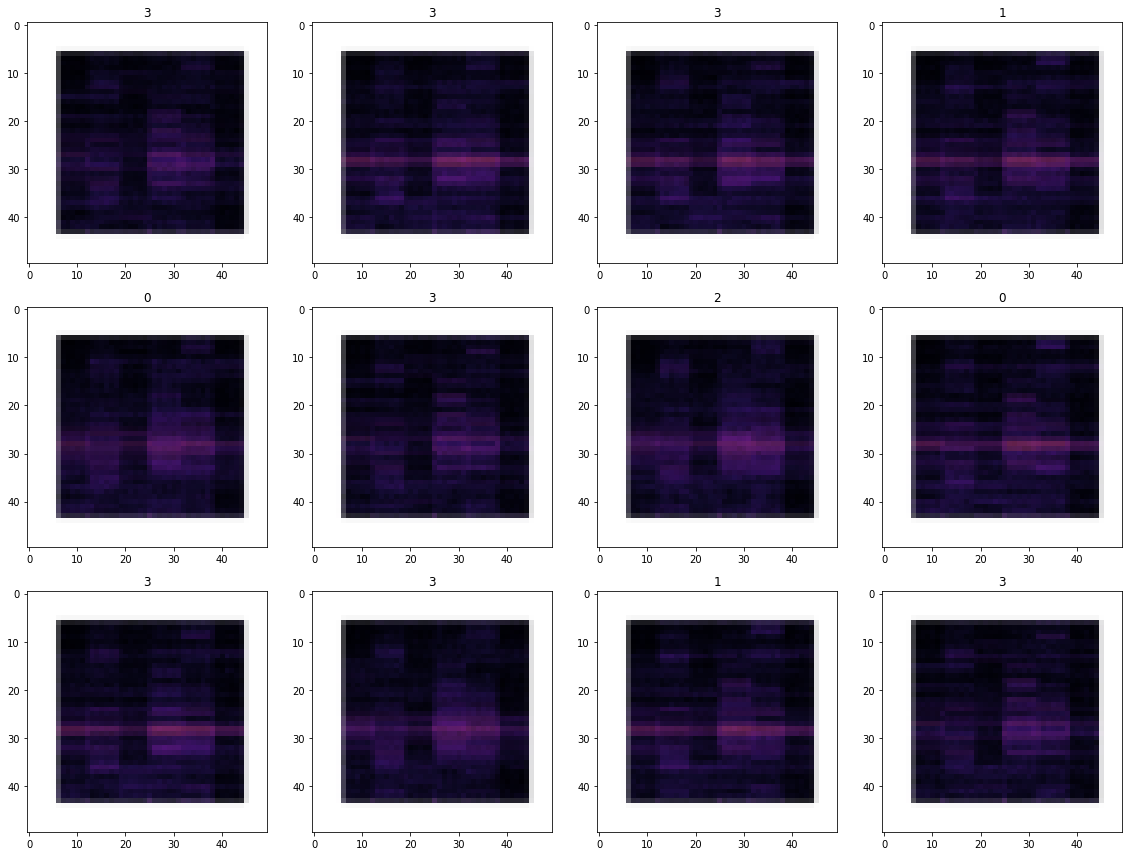

In [ ]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

In [ ]:
%reload_ext autoreload
%autoreload
import gluoncv
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset

In [ ]:
!mkdir /content/dataset/output

In [ ]:
import splitfolders
input_folder = '/content/dataset/Train'
output_folder = '/content/dataset/output'
splitfolders.ratio(input_folder, output = output_folder, seed=42, ratio=(0.80,0,0.20))

Copying files: 1190 files [00:00, 2048.41 files/s]


In [ ]:
train_dataset, _,test_dataset = ImageDataset.from_folders('/content/dataset/output')
print(train_dataset)

                                           image  label
0     /content/dataset/output/train/0/1411_1.png      0
1    /content/dataset/output/train/0/1411_10.png      0
2     /content/dataset/output/train/0/1411_2.png      0
3     /content/dataset/output/train/0/1411_4.png      0
4     /content/dataset/output/train/0/1411_5.png      0
..                                           ...    ...
947   /content/dataset/output/train/3/976_95.png      3
948   /content/dataset/output/train/3/976_96.png      3
949   /content/dataset/output/train/3/976_97.png      3
950   /content/dataset/output/train/3/976_98.png      3
951   /content/dataset/output/train/3/976_99.png      3

[952 rows x 2 columns]


In [ ]:
batch_size = 100
lr = ag.Categorical(0.025)
model = ag.Categorical('efficientnet_b0')
hpo = { 'model': model,
       'batch_size': batch_size,
       'lr': lr,
       'epochs':100}
predictor = ImagePredictor()
predictor.fit(train_dataset, hyperparameters=hpo)

INFO:autogluon.vision.predictor.predictor:ImagePredictor sets accuracy as default eval_metric for classification problems.
INFO:autogluon.vision.predictor.predictor:`time_limit=auto` set to `time_limit=7200`.
INFO:autogluon.vision.predictor.predictor:Reset labels to [0, 1, 2, 3]
INFO:autogluon.vision.predictor.predictor:Randomly split train_data into train[856]/validation[96] splits.
INFO:autogluon.vision._gluoncv.image_classification:Starting fit without HPO
INFO:TorchImageClassificationEstimator:modified configs(<old> != <new>): {
INFO:TorchImageClassificationEstimator:root.train.batch_size 32 != 100
INFO:TorchImageClassificationEstimator:root.train.lr        0.01 != 0.025
INFO:TorchImageClassificationEstimator:root.train.epochs    200 != 100
INFO:TorchImageClassificationEstimator:root.train.early_stop_patience -1 != 10
INFO:TorchImageClassificationEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:TorchImageClassificationEstimator:root.train.early_stop_baseline 0.0 != -inf
IN

In [ ]:
dat_test = dat_test.reset_index()
dat_test['index'] = dat_test['imgname'].str.extract(r'(\w+).png') + '.csv'

In [ ]:
dat_test

,level_0,filepath,imgname,imgpath,index,res,Label
0,0,/content/SN_Test/test_data_47.csv,test_data_47.png,/content/dataset/Test/test_data_47.png,test_data_47.csv,2,unbalanceM2
1,1,/content/SN_Test/test_data_282.csv,test_data_282.png,/content/dataset/Test/test_data_282.png,test_data_282.csv,3,unbalanceM3
2,2,/content/SN_Test/test_data_55.csv,test_data_55.png,/content/dataset/Test/test_data_55.png,test_data_55.csv,3,unbalanceM3
3,3,/content/SN_Test/test_data_107.csv,test_data_107.png,/content/dataset/Test/test_data_107.png,test_data_107.csv,0,normal
4,4,/content/SN_Test/test_data_313.csv,test_data_313.png,/content/dataset/Test/test_data_313.png,test_data_313.csv,3,unbalanceM3
...,...,...,...,...,...,...,...
355,355,/content/SN_Test/test_data_44.csv,test_data_44.png,/content/dataset/Test/test_data_44.png,test_data_44.csv,3,unbalanceM3
356,356,/content/SN_Test/test_data_94.csv,test_data_94.png,/content/dataset/Test/test_data_94.png,test_data_94.csv,0,normal
357,357,/content/SN_Test/test_data_36.csv,test_data_36.png,/content/dataset/Test/test_data_36.png,test_data_36.csv,0,normal
358,358,/content/SN_Test/test_data_168.csv,test_data_168.png,/content/dataset/Test/test_data_168.png,test_data_168.csv,3,unbalanceM3


In [ ]:
result = predictor.predict(dat_test[['imgpath']].rename(columns={'imgpath':'image'}))
print(result)

0      2
1      2
2      3
3      0
4      3
      ..
355    2
356    0
357    0
358    2
359    2
Name: label, Length: 360, dtype: int64


In [ ]:
dat_test['res'] = result.tolist()
dat_test['Label'] = dat_test['res'].map(inv_mapping)
dat_test.set_index('index')[['Label']]

,Label
index,
test_data_47.csv,unbalanceM2
test_data_282.csv,unbalanceM2
test_data_55.csv,unbalanceM3
test_data_107.csv,normal
test_data_313.csv,unbalanceM3
...,...
test_data_44.csv,unbalanceM2
test_data_94.csv,normal
test_data_36.csv,normal


In [ ]:
submission = pd.read_csv('/content/SN_Submit.csv')
submission

,file,class
0,test_data_1.csv,unbalanceM3
1,test_data_2.csv,unbalanceM1
2,test_data_3.csv,unbalanceM1
3,test_data_4.csv,NaN
4,test_data_5.csv,NaN
...,...,...
355,test_data_356.csv,NaN
356,test_data_357.csv,NaN
357,test_data_358.csv,NaN
358,test_data_359.csv,NaN


In [ ]:
submission = submission.set_index('file').join(dat_test.set_index('index')[['Label']])
submission.iloc[3:]['class'] = submission['Label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
submission

,class,Label
file,,
test_data_1.csv,unbalanceM3,unbalanceM3
test_data_2.csv,unbalanceM1,unbalanceM2
test_data_3.csv,unbalanceM1,unbalanceM2
test_data_4.csv,normal,normal
test_data_5.csv,unbalanceM2,unbalanceM2
...,...,...
test_data_356.csv,unbalanceM3,unbalanceM3
test_data_357.csv,unbalanceM3,unbalanceM3
test_data_358.csv,normal,normal


In [ ]:
submission.drop('Label', axis=1).to_csv('submission.csv')

In [ ]:
!kaggle competitions submit -c ss3-hackathon-online-signal-processing -f submission.csv -m "hello kaggle"

100% 10.1k/10.1k [00:01<00:00, 8.47kB/s]
400 - Bad Request
